In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sklearn.preprocessing as prep
import math

## Reading in of data & preprocessing

In [2]:
data = pd.read_csv("Daten/zip.train", header=None, sep=" ")
data = data.iloc[:,0:-1] # last column (NaN) is deleted
scaler = prep.MinMaxScaler()
norm_data = data.copy() # copy ist notwendig, andernfalls wird data mit den folgenden Zeilen auch geändert!
norm_data.iloc[:,1:] = scaler.fit_transform(norm_data.iloc[:,1:]) # data is transformed to range from 0-1 for each row (only cols 1:end)
#MinMaxScaler: see http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
display(data.head())
display(norm_data.head())
zstand_scaler = prep.StandardScaler()
zstand_data = data.copy()
zstand_data.iloc[:,1:] = zstand_scaler.fit_transform(zstand_data.iloc[:,1:])
display(zstand_data.head())

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.1845,0.9310,...,0.6520,0.9115,1.0000,0.7410,0.2630,0.0045,0.0000,0.0000,0.000,0.0
1,5.0,0.0,0.0,0.0,0.0935,0.1645,0.0955,0.0565,0.1645,0.0735,...,0.1645,0.1645,0.4835,0.8805,0.8810,0.5630,0.4525,0.1645,0.086,0.0
2,4.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.4455,1.0000,0.4105,0.0000,0.0000,0.000,0.0
3,7.0,0.0,0.0,0.0,0.0000,0.0000,0.3635,0.8420,0.9800,0.7250,...,0.3410,1.0000,0.7680,0.0065,0.0000,0.0000,0.0000,0.0000,0.000,0.0
4,3.0,0.0,0.0,0.0,0.0000,0.0000,0.0360,0.3980,0.8755,0.7330,...,0.7330,0.8195,1.0000,1.0000,0.8955,0.7195,0.4005,0.0585,0.000,0.0


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-0.069284,-0.124758,-0.199991,-0.311415,-0.450697,-0.619879,-0.881319,-0.761770,1.214779,...,0.650258,0.907355,1.166749,1.096857,0.308508,-0.369357,-0.258657,-0.186315,-0.130262,-0.080576
1,5.0,-0.069284,-0.124758,-0.199991,0.207321,0.203867,-0.316062,-0.723494,-0.813836,-1.062997,...,-0.611320,-1.076886,-0.197335,1.481256,2.430343,2.324689,2.749895,1.252351,0.951586,-0.080576
2,4.0,-0.069284,-0.124758,-0.199991,-0.311415,-0.450697,-0.619879,-0.881319,-1.242082,-1.258234,...,-1.037022,-1.513844,-1.474266,0.282593,2.838916,1.589072,-0.258657,-0.186315,-0.130262,-0.080576
3,7.0,-0.069284,-0.124758,-0.199991,-0.311415,-0.450697,0.536536,1.470694,1.309167,0.667581,...,-0.154564,1.142436,0.554034,-0.927092,-0.594473,-0.391064,-0.258657,-0.186315,-0.130262,-0.080576
4,3.0,-0.069284,-0.124758,-0.199991,-0.311415,-0.450697,-0.505351,0.230440,1.037121,0.688832,...,0.859874,0.662977,1.166749,1.810543,2.480127,3.079601,2.404160,0.325308,-0.130262,-0.080576


## Looking at one example image

In [3]:
example_image = pd.DataFrame(norm_data.iloc[1,1:]) # select row 2 of the dataframe, columns 1 to end
print(example_image.shape) # show shape of image
example_image_reshaped = example_image.values.reshape(16,16)

(256, 1)


<function matplotlib.pyplot.show(*args, **kw)>

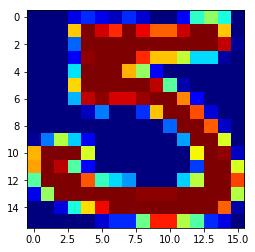

In [4]:
plt.imshow(example_image_reshaped,cmap="jet",interpolation="nearest")
plt.show

## Useful functions

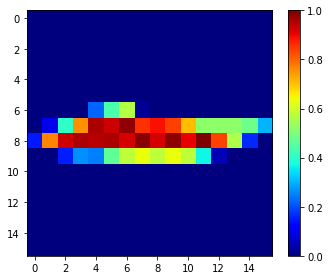

In [5]:
def get_digit_rows(data,digit): 
    """returns all rows of a given digit
        careful: first column (target digit) still included!!!"""
    rows = data[data[0] == float(digit)]
    return pd.DataFrame(rows)

#display(get_digit_rows(norm_data,2)) # testing the function

def print_image_observation(data,row):
    """shows the image of a specific row in data"""
    img = data.iloc[row,1:].values.reshape(16,16)  
    plt.imshow(img,cmap="jet",interpolation="nearest",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
    return None
   
print_image_observation(norm_data,3637)

def get_digit_stat_array(data,digit,stat):
    """returns the (reshaped) 16x16 image for a given digit and statistic"""
    digit_rows = get_digit_rows(data,digit).iloc[:,1:]
    if stat == "mean":
        stat_row = digit_rows.mean()
    elif stat == "sd":
        stat_row = np.std(digit_rows)
    elif stat == "max":
        stat_row = np.max(digit_rows)
    elif stat == "min":
        stat_row = np.min(digit_rows)
    else: print("please enter a valid stat (mean,sd,max or min)")
    img = stat_row.values.reshape(16,16)
    return img

#display(get_digit_stat_array(norm_data,8,"mean")) # testing the function

def print_digit(data,digit,stat):
    """returns a plot showing the digit image statistic, e.g. average digit image
        colormap ranges from 0 to 1"""
    img = get_digit_stat_array(data,digit,stat)
    plt.imshow(img,cmap="jet",interpolation="nearest",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
    

#print_digit(norm_data,4,"mean") # testing the function


## Extracting stat images for all numbers & showing them all in a plot

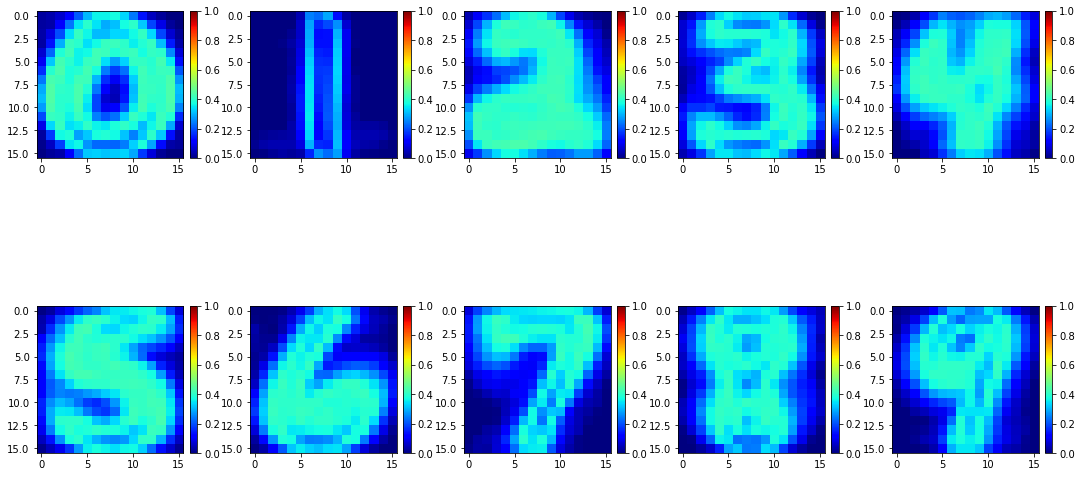

In [6]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    print_digit(norm_data,i,"sd") # possible values for stat: "mean", "sd", "max", "min"

## Combining mean and sd image to build a 'predictive image' for each digit

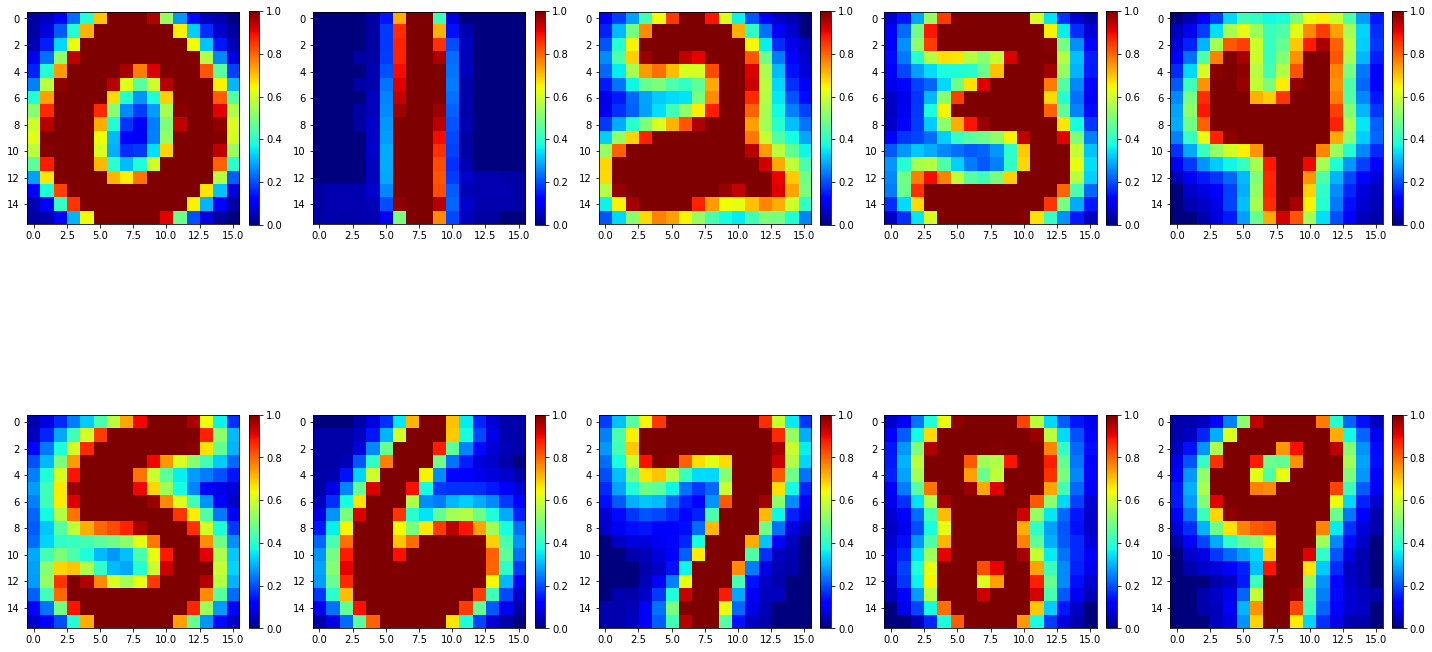

In [7]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_sd = get_digit_stat_array(norm_data,i,"sd")
    img_mean = get_digit_stat_array(norm_data,i,"mean")
    img_combi = img_mean/(img_sd+0.00000000000000000000001) # yes, this is not ideal :D solutions for avoiding div by zero needed
    plt.imshow(img_combi,cmap="jet",interpolation="nearest",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
plt.show()

## Summaries for each digit: mean, max, min, sd, number of observations

In [8]:
## For calculation of mean, max, min the mean array is used. For sd, the sd array is used. 
#NrObs = Number of observations for each digit

vals = np.zeros((5,10)) #creating an empty np_array
stats_df = pd.DataFrame(data=vals,columns = [0,1,2,3,4,5,6,7,8,9],index = ["Mean","Max","Min","SD","NrObs"])
for j in range(0,10):
    meanrow = get_digit_stat_array(norm_data,j,"mean") # mean image for each digit
    sdrow = get_digit_stat_array(norm_data,j,"sd")
    meanval = np.mean(meanrow)
    maxval = np.max(meanrow)
    minval = np.min(meanrow)
    sdval = np.mean(sdrow) # the mean of the sd image --> average sd
    stats_df.loc['Mean',j] = meanval 
    stats_df.loc['Max',j] = maxval
    stats_df.loc['Min',j] = minval
    stats_df.loc['SD',j] = sdval
    stats_df.loc['NrObs',j] = get_digit_rows(norm_data,j).shape[0]
display(stats_df)


,0,1,2,3,4,5,6,7,8,9
Mean,0.350544,0.148253,0.278818,0.283523,0.215083,0.288191,0.252702,0.208200,0.277876,0.224641
Max,0.910621,0.951885,0.664697,0.861942,0.753596,0.868888,0.862950,0.862105,0.854205,0.847249
Min,0.000000,0.000000,0.000000,0.000003,0.000000,0.000331,0.000000,0.000000,0.000000,0.000000
SD,0.288922,0.077688,0.312427,0.271106,0.268963,0.300784,0.242470,0.208244,0.261274,0.215555
NrObs,1194.000000,1005.000000,731.000000,658.000000,652.000000,556.000000,664.000000,645.000000,542.000000,644.000000


## Identifying and removing outliers

In [9]:
def outside_boundaries(myseries,lower,upper):
    """returns the number of elements of myseries which are outside the lower-upper range (lower and upper are also series)"""
    within_lims = myseries.between(lower,upper,inclusive=True)
    return myseries.shape[0] - sum(within_lims)

def identify_outlier_rows(data,digit,limit):
    """returns the image rows (=observations) for each digit which are very different from the other image rows. 
    Identifies image rows of a digit, where more than limit * pixels (limit ranges between 0 and 1) are outlier 
    pixels (outlier pixel = outside mean +- 2sd image values). E.g. if limit = 0.1 --> observations are identified 
    as outliers if 0.1 * 256 pixels are outside the mean +- 2sd range"""
    all_rows = get_digit_rows(norm_data,digit).iloc[:,1:]
    nr_observations = all_rows.shape[0]
    nr_limit_pixels = limit * 256
    print(f"Nr of observations: {nr_observations}")
    print(f"If an observation (= a row of data) has more than {nr_limit_pixels} outlier pixels, it is identified as outlier observation")
    all_rows.columns = range(all_rows.shape[1]) # colnames müssen geändert werden, damit sie wieder von 0 bis ende gehen (statt bei 1 anzufangen)!
    all_rows.index = range(nr_observations) 
    #display(all_rows)      
    mean_array = get_digit_stat_array(norm_data,digit,"mean")
    sd_array = get_digit_stat_array(norm_data,digit,"sd")
    upper_lim = pd.Series((mean_array + 2*sd_array).flatten()) # .flatten() and pd.Series reconvert the 16*16 array to a 256 Series
    lower_lim = pd.Series((mean_array - 2*sd_array).flatten())
    digit_nr_outlier_pixels = pd.Series(np.zeros(nr_observations))
    for index,row in all_rows.iterrows():
        digit_nr_outlier_pixels[index] = outside_boundaries(row,lower_lim,upper_lim) 
    #print(f"Number of outlier pixels for each of the {nr_observations} observations: ")
    #display(digit_nr_outlier_pixels)
    which_row_is_outlier = digit_nr_outlier_pixels.gt(nr_limit_pixels)
    print(f"{sum(which_row_is_outlier)} outlier observations were identified for this digit.")
    infodf = pd.concat([lower_lim,pd.Series(mean_array.flatten()),upper_lim,all_rows.transpose()],axis=1)
    #with pd.option_context('display.max_rows', None, 'display.max_columns', 10): # shows the whole df 
        #display(infodf)
    return all_rows.loc[which_row_is_outlier]


display(identify_outlier_rows(norm_data,1,0.2))


Nr of observations: 1005
If an observation (= a row of data) has more than 51.2 outlier pixels, it is identified as outlier observation
3 outlier observations were identified for this digit.


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
663,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.0000,0.2770,0.9785,...,0.3495,0.6505,0.5715,0.3330,0.3330,0.3330,0.333,0.235,0.0,0.0
792,0.0,0.0,0.0,0.0,0.0,0.118,0.8215,0.8455,0.4935,0.0045,...,0.0000,0.2535,0.7690,0.7700,0.2480,0.0000,0.000,0.000,0.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,0.2245,0.7925,0.9995,...,0.4895,0.9995,0.9995,0.9995,0.9995,0.5915,0.000,0.000,0.0,0.0


Nr of observations: 645
If an observation (= a row of data) has more than 38.4 outlier pixels, it is identified as outlier observation
14 outlier observations were identified for this digit.


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
36,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.2360,0.3230,0.0000,0.0,0.0,0.0,0.0
45,0.000000,0.0000,0.0000,0.0000,0.0000,0.1725,0.7515,0.9015,0.1500,0.0000,...,0.4355,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
52,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0995,0.1350,...,0.0000,0.0420,0.6605,0.9165,0.7600,0.1515,0.0,0.0,0.0,0.0
65,0.000000,0.0000,0.0000,0.0000,0.0175,0.1710,0.1725,0.5315,0.5695,0.5695,...,0.5450,0.0325,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
181,0.000000,0.0000,0.2150,0.3040,0.6395,0.7290,1.0000,1.0000,0.9680,0.2695,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
189,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
190,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
211,0.000000,0.0000,0.0555,0.4480,0.6585,0.9995,0.9995,0.9995,0.9995,0.9995,...,0.9995,0.6385,0.0025,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
350,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
549,0.258852,0.9225,1.0000,0.7690,0.4295,0.2885,0.1460,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0


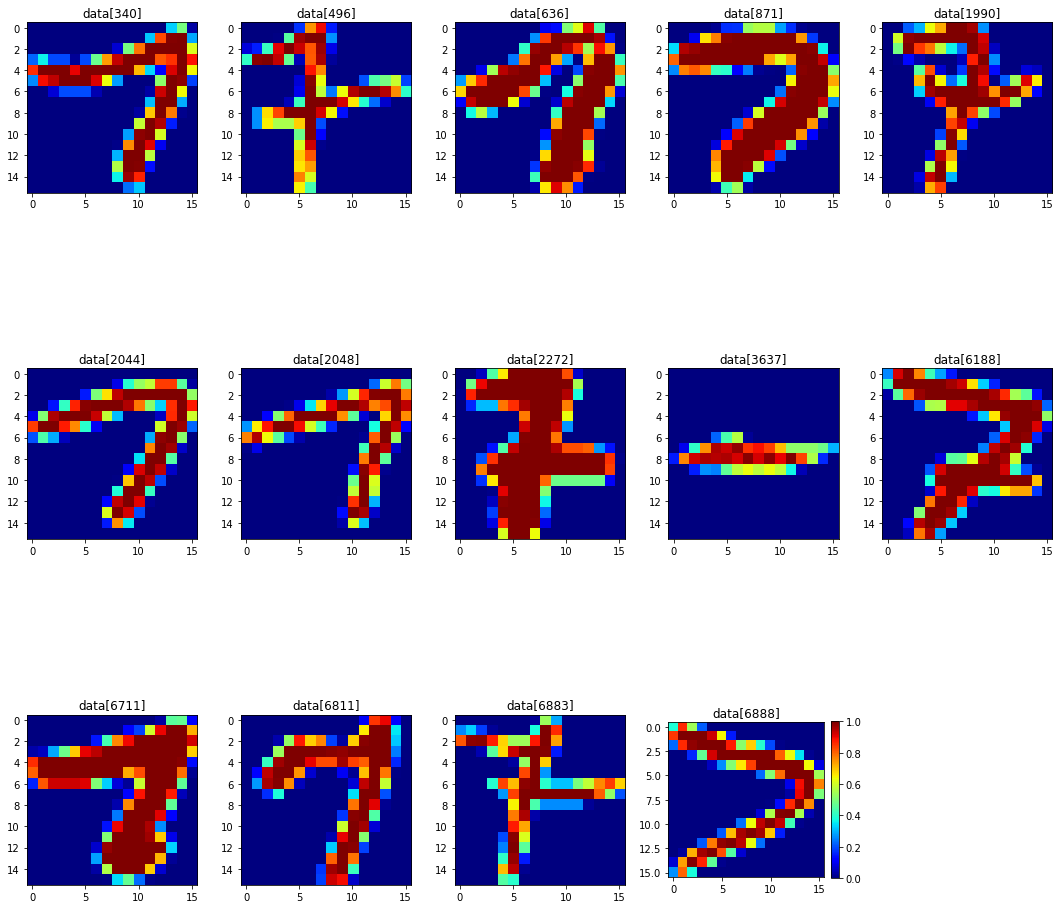

In [10]:
import math # fürs aufrunden math.ceil

#### schneller machen! dauert ewig

def print_outlier_images(data,digit,limit):
    """returns a plot showing the digit outlier observations for the chosen limit (limit ranges from 0-1). E.g. 
        if limit = 0.1, then an observation is considered as outlier if more than 256*0.1 = 25.6 pixels are outside 
        the mean +-2sd range. (I.e., the larger the limit, the less outliers are identified)"""
    fig = plt.figure(figsize=(15,15))
    ax = []
    rows = identify_outlier_rows(data,digit,limit) #dataframe with index = rownr in get_digit_rows
    display(rows)
    columns_figure = 5
    if not rows.empty:
        rows_figure = math.ceil(rows.shape[0]/columns_figure)
    else: return print("No outliers were found!")
    if rows.shape[0] > 50:
        print(f"There are {rows.shape[0]} outliers! Surely you don't want to see them all...")
        return None
    else:
        for i in range(0, rows.shape[0]):
            ax.append(fig.add_subplot(rows_figure, columns_figure, i+1))
            img = rows.iloc[i,:].values.reshape(16,16)
            indexlabel = rows.iloc[i].name
            datarow = get_digit_rows(norm_data,digit).iloc[indexlabel].name #finding the index of the row in the original data dataframe
            ax[i].set_title(f"data[{datarow}]")
            plt.imshow(img,cmap="jet",interpolation="nearest",vmin=0,vmax=1)
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.tight_layout()
        plt.show()

print_outlier_images(norm_data,7,0.15)

In [11]:
# testing the .flatten() function
# not important for analysis, just a check

mean_3 = get_digit_stat_array(norm_data,3,"mean")
vector_mean_3_flattened = pd.Series(mean_3.flatten())
data_3 = get_digit_rows(norm_data,3).iloc[:,1:]
vector_mean_3 = data_3.mean()
vector_mean_3.index = range(vector_mean_3.shape[0])
both = pd.concat([vector_mean_3_flattened,vector_mean_3],axis=1)
#display(both)

# Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [13]:
#label_df[label_df["Target"] == 0].groupby("KMeans")["Target"].count()

In [40]:
def run_cluster_analysis(prep_data):
    K = KMeans(n_clusters = 10).fit(prep_data)
    K_labels_nr = K.labels_
    G = GaussianMixture(n_components = 10).fit(prep_data)
    G_labels_nr = G.predict(prep_data)
    K_labels = [["A","B","C","D","E","F","G","H","I","J"][nr] for nr in K_labels_nr]
    G_labels = [["A","B","C","D","E","F","G","H","I","J"][nr] for nr in G_labels_nr]
    label_df = pd.concat([norm_data.iloc[:,0],pd.Series(K_labels),pd.Series(G_labels)],axis=1)
    label_df.columns = ["Target","KMeans","Gaussian"]
    label_df.Target = label_df.Target.astype(int)
    display(label_df.head())
    return [K,G,label_df]

def make_barplot(method,res):
    bar_data = pd.DataFrame(data = np.zeros((10,10)),columns=["A","B","C","D","E","F","G","H","I","J"])
    label_df = res[2]
    for digit in range(0,10):
        temp_result = label_df[label_df["Target"] == digit].groupby(method)["Target"].count()
        #print((temp_result))
        clusters_keys = temp_result.keys()
        #print([clusters_keys])
        
        for cluster_idx in [clusters_keys]:
            bar_data.loc[digit,cluster_idx] = temp_result[cluster_idx]

    result_df_scaled_tar = bar_data.divide(bar_data.sum(1), axis=0)
    result_df_scaled_tar.plot.bar(figsize=(20,8))

    result_df_scaled_clust = bar_data.divide(bar_data.sum(0), axis=1)
    result_df_scaled_clust.T.plot.bar(figsize=(20,8))

def get_clust_rows(data,method,cluster,res):
    """returns the rows for a certain cluster and method (KMeans or Gaussian)"""
    label_df = res[2]
    cluster_rows = data[label_df[method] == cluster]
    return cluster_rows.iloc[:,1:]

def get_stat_array(data_rows,stat,res):
    """returns the (reshaped) 16x16 image for given rows (256 cols) and statistic"""
    if stat == "mean":
        stat_row = data_rows.iloc[:,0:256].mean()
    elif stat == "median":
        stat_row = data_rows.iloc[:,0:256].median()
    else: print("please enter a valid stat (mean or median)")
    img = stat_row.values.reshape(16,16)
    return img

def get_stat_array_reduced(data_rows,stat,res):
    """returns the (reshaped) 16x16 image for given rows (256 cols) and statistic"""
    if stat == "mean":
        stat_row = data_rows.iloc[:,0:16].mean()
    elif stat == "median":
        stat_row = data_rows.iloc[:,0:16].median()
    else: print("please enter a valid stat (mean or median)")
    img = stat_row.values.reshape(4,4)
    return img

def print_subplots_all_clusters(data,method,stat,res):
    clusters = ["A","B","C","D","E","F","G","H","I","J"]
    ncols = 5
    nrows = math.ceil(len(clusters)/2)
    fig = plt.figure(figsize = (20,20)) 
    for clust in clusters:
        rows = get_clust_rows(data,method,clust,res)
        stat_img = get_stat_array(rows,stat,res)
        #print(rows)
        plt.subplot(nrows,ncols,clusters.index(clust)+1)
        plt.title(clust,fontsize = 25)
        plt.imshow(stat_img, cmap='hot', interpolation='none',vmin=-1,vmax=1)
        plt.colorbar(fraction=0.046, pad=0.04)
    plt.suptitle(method, fontsize=30,y=1.03)
    #plt.subplots_adjust(wspace=0.05)
    plt.tight_layout()
    plt.show()
    return None
 
def print_subplots_all_clusters_reduced(data,method,stat,res):
    clusters = ["A","B","C","D","E","F","G","H","I","J"]
    ncols = 5
    nrows = math.ceil(len(clusters)/2)
    fig = plt.figure(figsize = (20,20)) 
    for clust in clusters:
        rows = get_clust_rows(data,method,clust,res)
        stat_img = get_stat_array_reduced(rows,stat,res)
        #print(rows)
        plt.subplot(nrows,ncols,clusters.index(clust)+1)
        plt.title(clust,fontsize = 25)
        plt.imshow(stat_img, cmap='hot', interpolation='none',vmin=-1,vmax=1)
        plt.colorbar(fraction=0.046, pad=0.04)
    plt.suptitle(method, fontsize=30,y=1.03)
    #plt.subplots_adjust(wspace=0.05)
    plt.tight_layout()
    plt.show()

,Target,KMeans,Gaussian
0,6,H,E
1,5,G,J
2,4,I,A
3,7,A,H
4,3,C,J


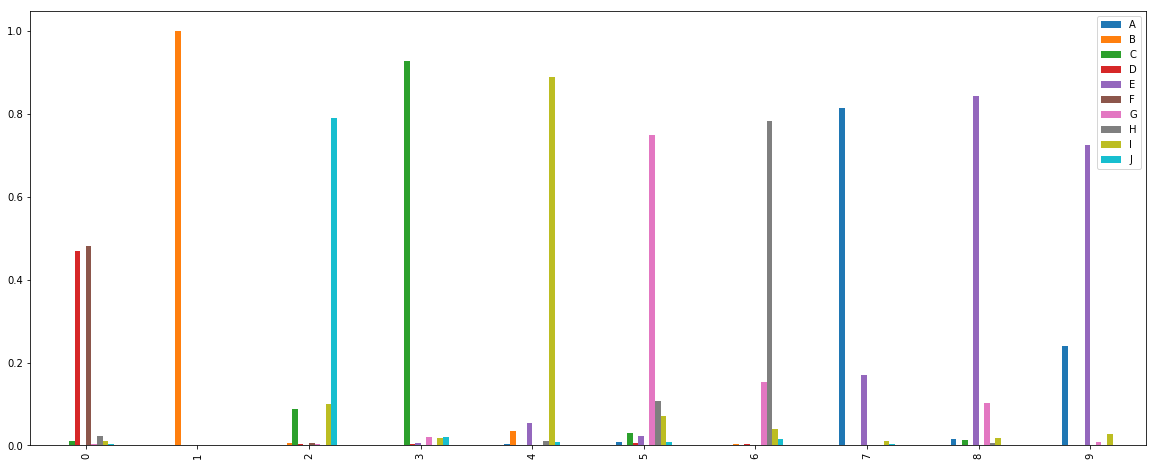

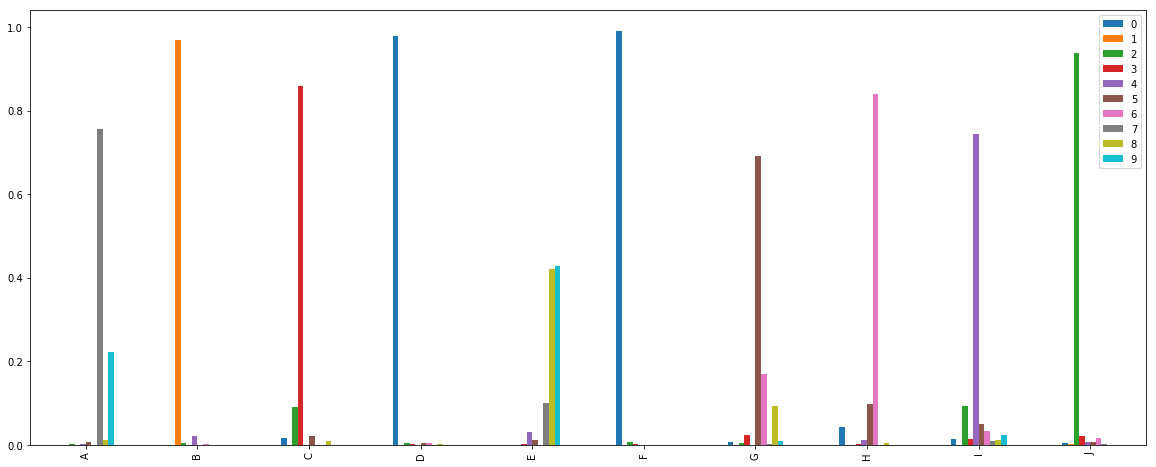

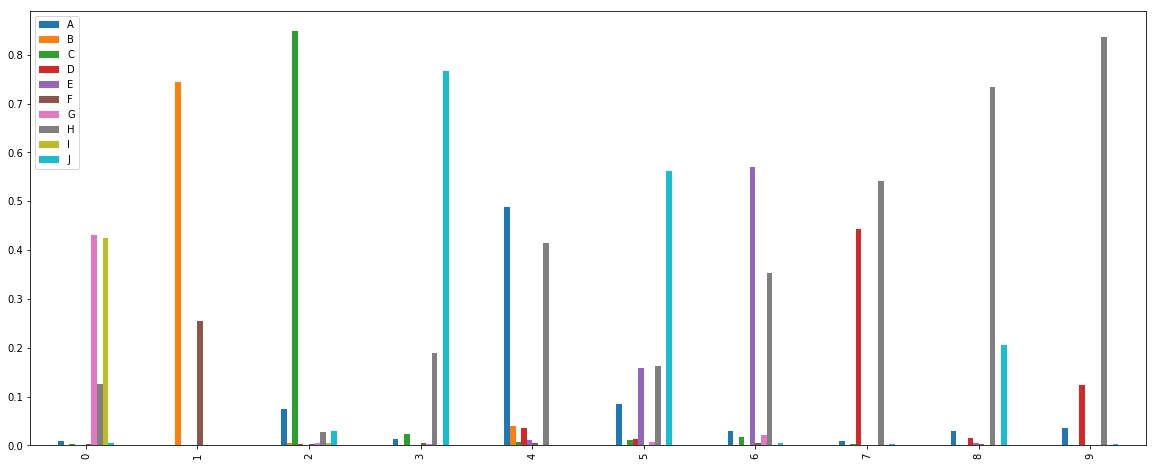

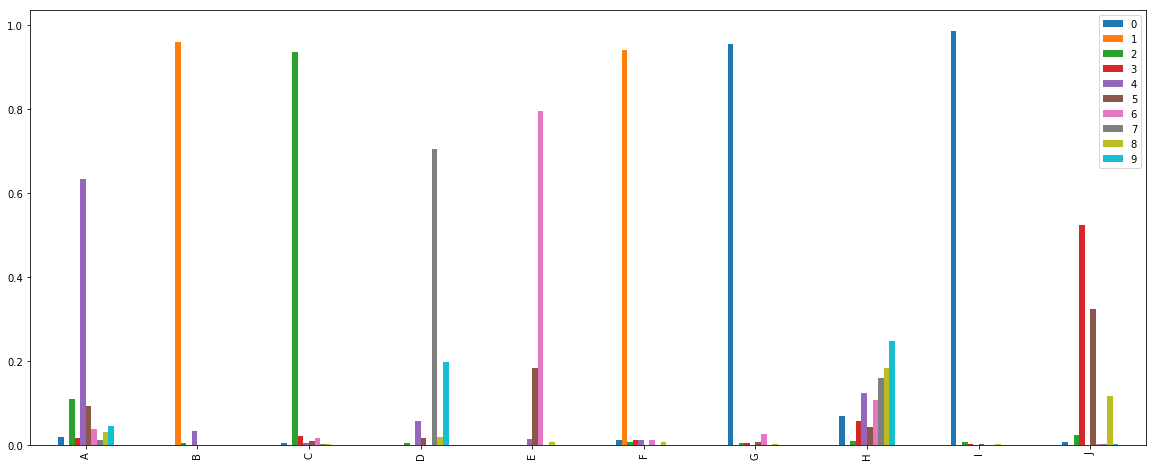

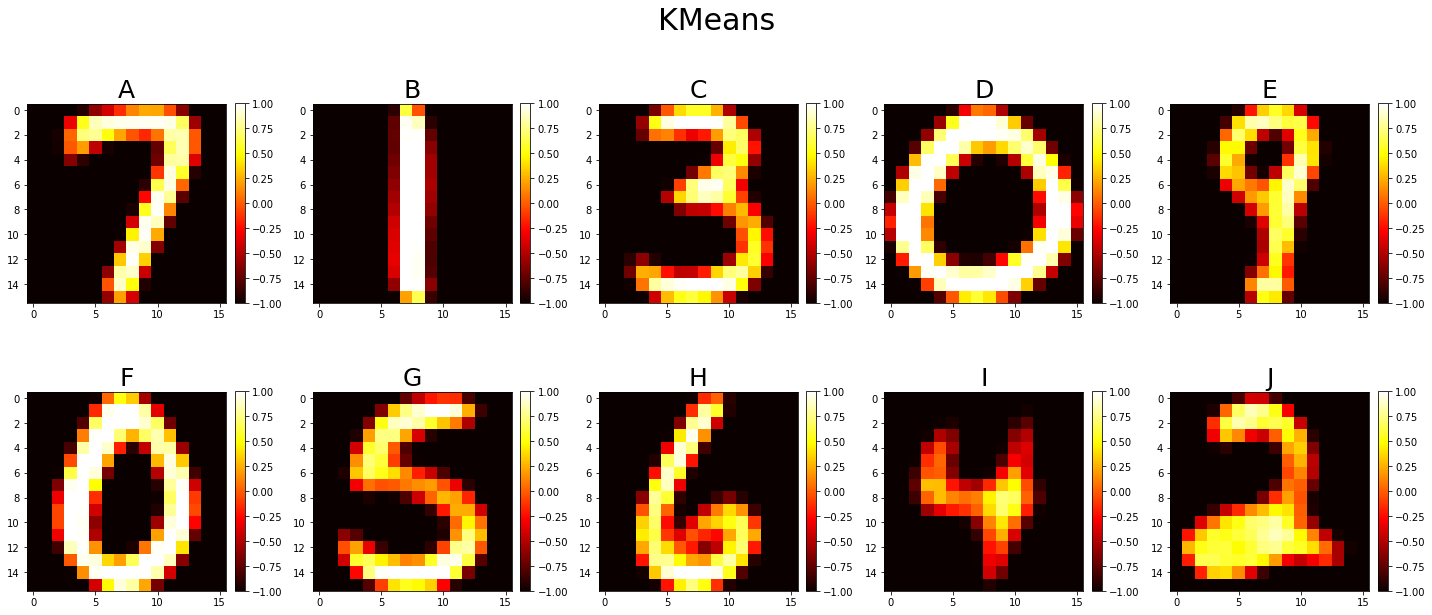

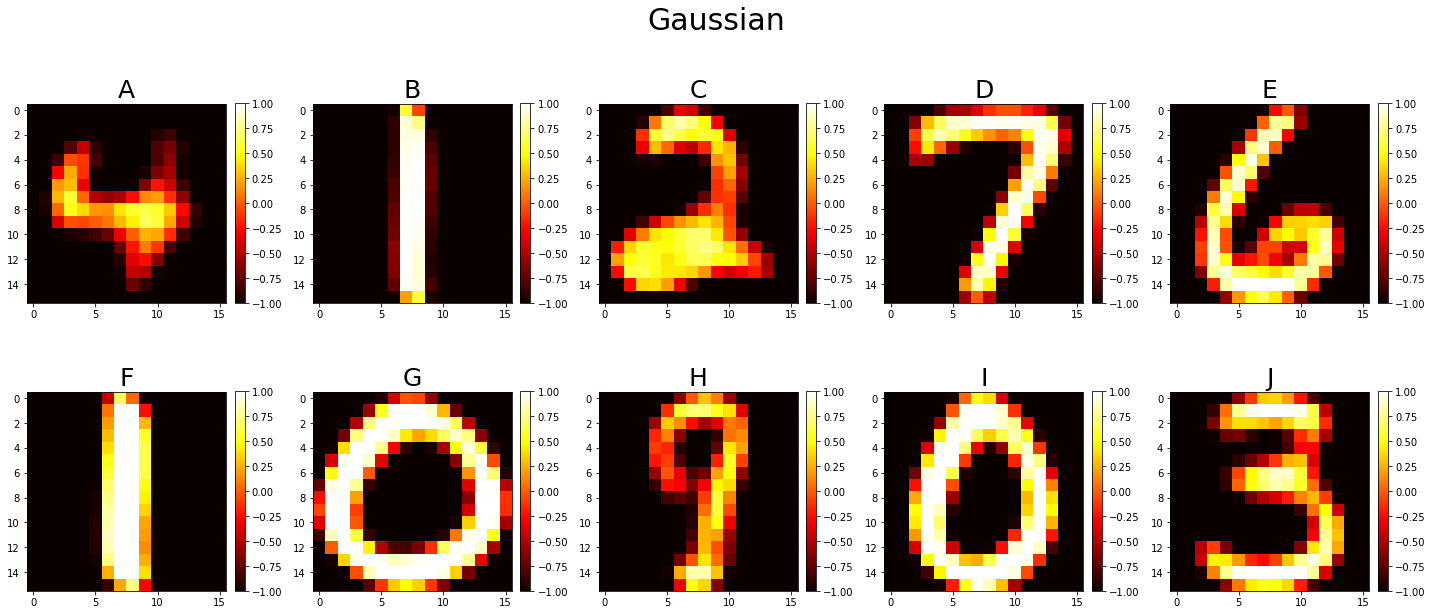

In [17]:
res = run_cluster_analysis(data)
make_barplot("KMeans",res)
make_barplot("Gaussian",res)
print_subplots_all_clusters(data,"KMeans","median",res)
print_subplots_all_clusters(data,"Gaussian","median",res)


# Clustering mit neighboring info

In [22]:
from skimage import transform

def add_neighbor_info(data):
    """does not take into account col 1 of data!!!
    creates new dataframe containing 16 additional columns with the local means of 4x4 imgs"""
    x = []
    for i in range(len(data)):
        img = pd.DataFrame(data.iloc[i,1:]).values.reshape(16,16)
        downscaled_img = transform.downscale_local_mean(img,(4,4)).flatten()
        x.append(downscaled_img)
    new_data = data.reset_index().iloc[:,1:]
    test3 = pd.concat([new_data,pd.DataFrame(x)],axis=1)
    test3.columns = range(test3.shape[1])
    return pd.DataFrame(test3)

In [23]:
nb_data = add_neighbor_info(data)
nb_data.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,-0.717812,-0.804563,-0.008250,-0.009562,0.027187,-0.051062,-0.576125,0.692063,0.627937,-0.785875
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,0.214625,-0.871188,-0.000250,-0.895750,-0.811813,0.244750,-0.182938,0.228562,0.386750,0.313187
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.047500,-0.998563,-0.616125,0.111375,0.332375,-0.601938,-1.000000,-0.900687,0.170063,-1.000000
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.093875,-0.848375,-1.000000,-0.911438,-0.075313,-1.000000,-1.000000,-0.403062,-0.557000,-1.000000
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.320750,-0.984812,-0.895563,-0.882188,-0.735687,-0.188812,-0.203000,0.169000,0.037375,-0.145813


,Target,KMeans,Gaussian
0,6,F,G
1,5,H,A
2,4,A,D
3,7,B,J
4,3,H,C


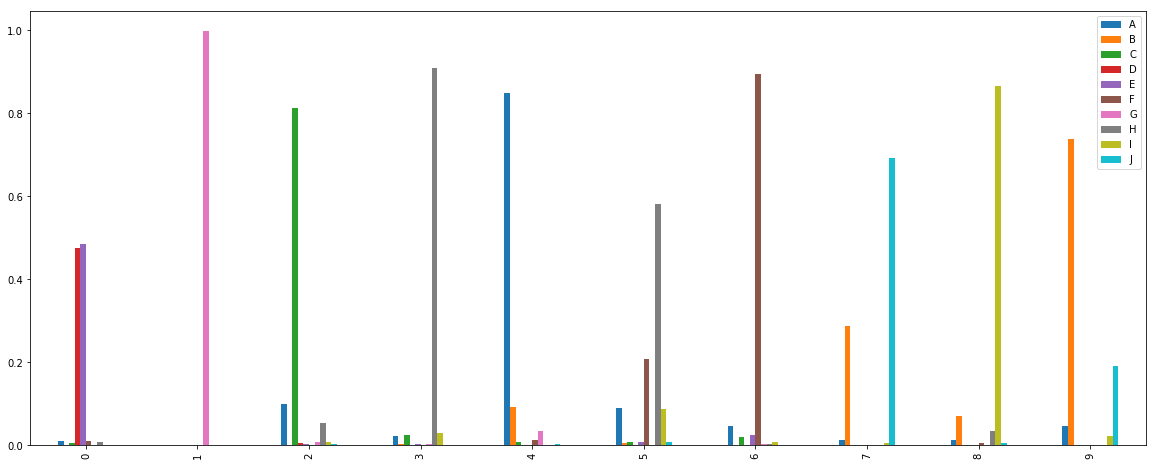

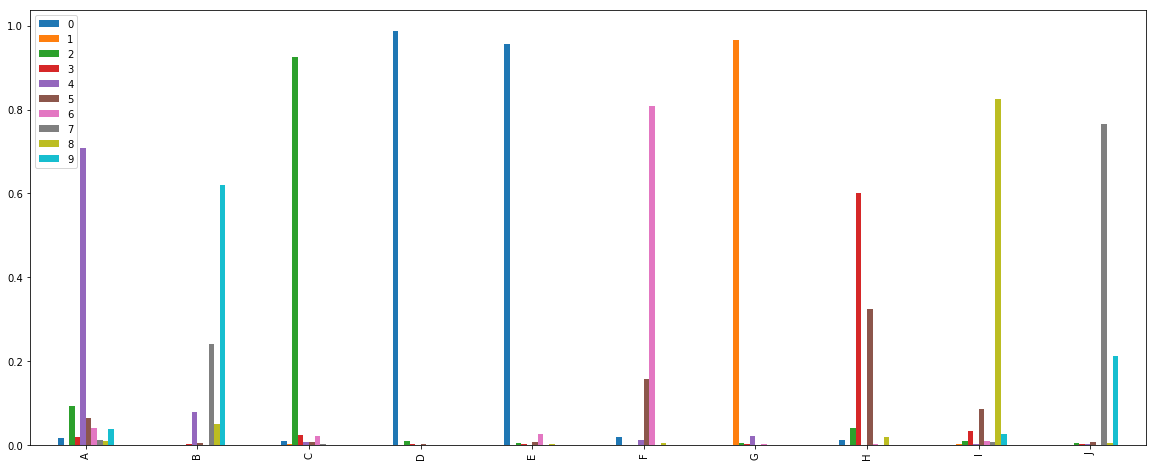

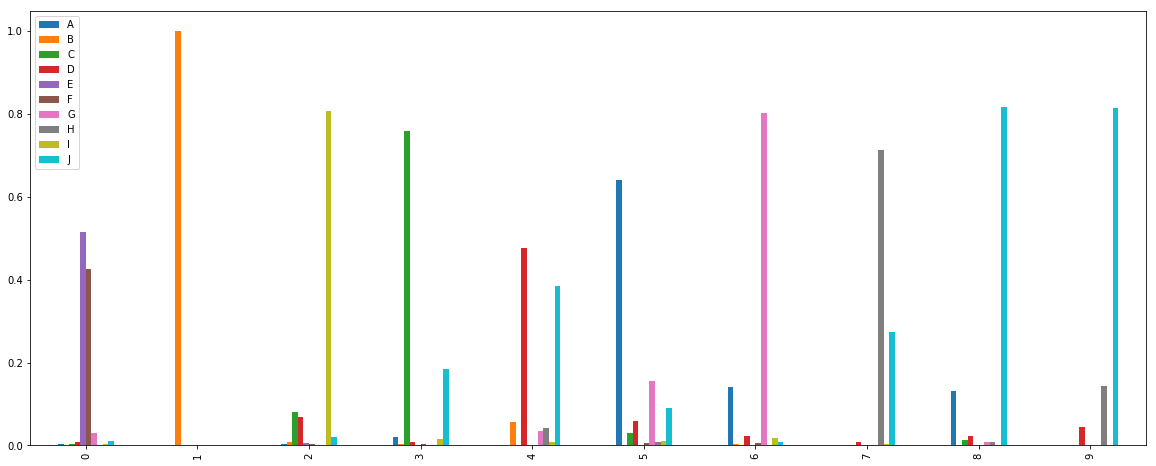

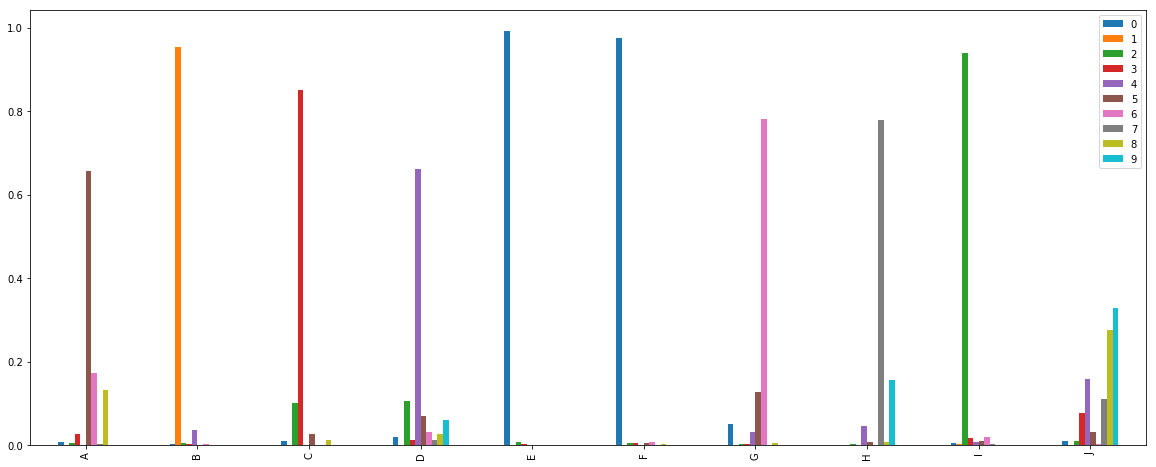

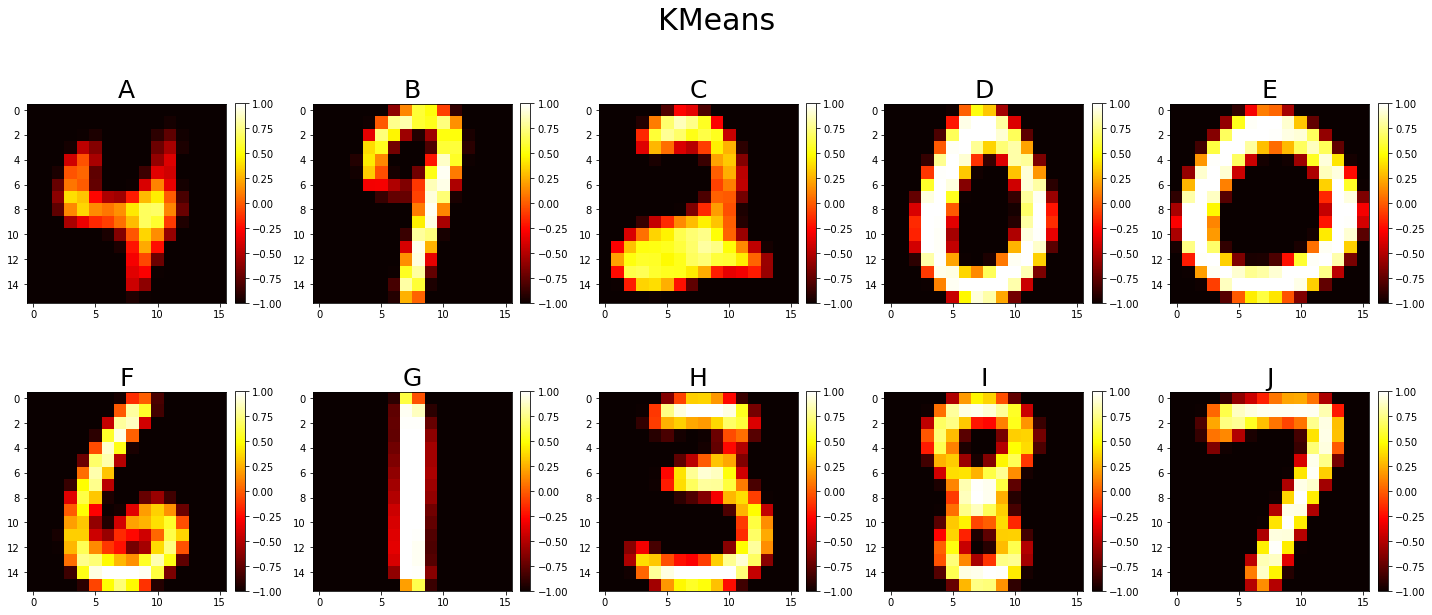

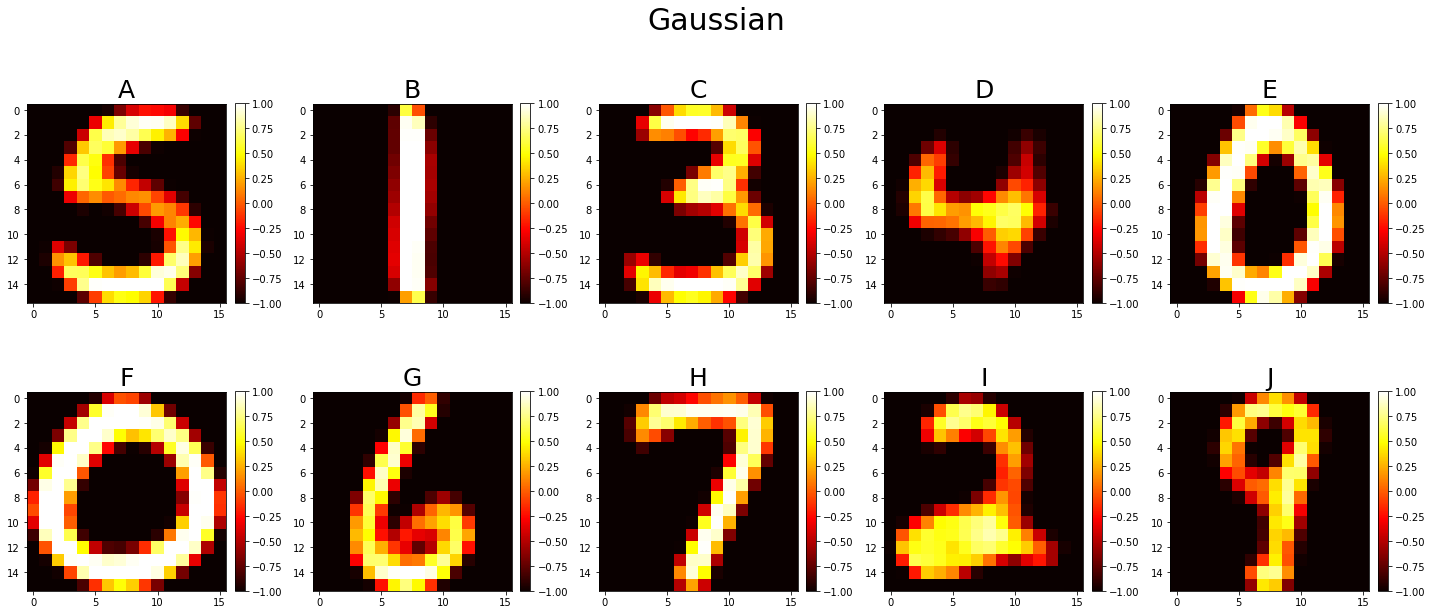

In [24]:
res2 = run_cluster_analysis(nb_data)
make_barplot("KMeans",res2)
make_barplot("Gaussian",res2)
print_subplots_all_clusters(nb_data,"KMeans","median",res2)
print_subplots_all_clusters(nb_data,"Gaussian","median",res2)

In [55]:
nb_data_reduced_vals = nb_data.iloc[:,257:273]
nb_data_reduced_tars = nb_data.iloc[:,0]
#display(pd.DataFrame(nb_data_reduced_tars))

nb_data_reduced = pd.concat([nb_data_reduced_tars,nb_data_reduced_vals],axis=1)
#print(nb_data_reduced.shape)
nb_data_reduced.columns = range(nb_data_reduced.shape[1])
nb_data_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,6.0,-1.000000,-0.474625,-0.375937,-1.000000,-0.821562,0.193125,-0.717812,-0.804563,-0.008250,-0.009562,0.027187,-0.051062,-0.576125,0.692063,0.627937,-0.785875
1,5.0,-0.859687,0.531687,0.310500,-0.038937,-0.833000,0.475687,0.214625,-0.871188,-0.000250,-0.895750,-0.811813,0.244750,-0.182938,0.228562,0.386750,0.313187
2,4.0,-1.000000,-0.987500,-0.138437,-0.937500,-0.733625,-0.354875,0.047500,-0.998563,-0.616125,0.111375,0.332375,-0.601938,-1.000000,-0.900687,0.170063,-1.000000
3,7.0,-0.869625,0.109813,0.074313,-0.647688,-0.667375,-0.701562,-0.093875,-0.848375,-1.000000,-0.911438,-0.075313,-1.000000,-1.000000,-0.403062,-0.557000,-1.000000
4,3.0,-1.000000,0.025062,0.063688,-1.000000,-1.000000,-0.238063,0.320750,-0.984812,-0.895563,-0.882188,-0.735687,-0.188812,-0.203000,0.169000,0.037375,-0.145813


,Target,KMeans,Gaussian
0,6,F,G
1,5,J,D
2,4,H,I
3,7,B,A
4,3,E,F


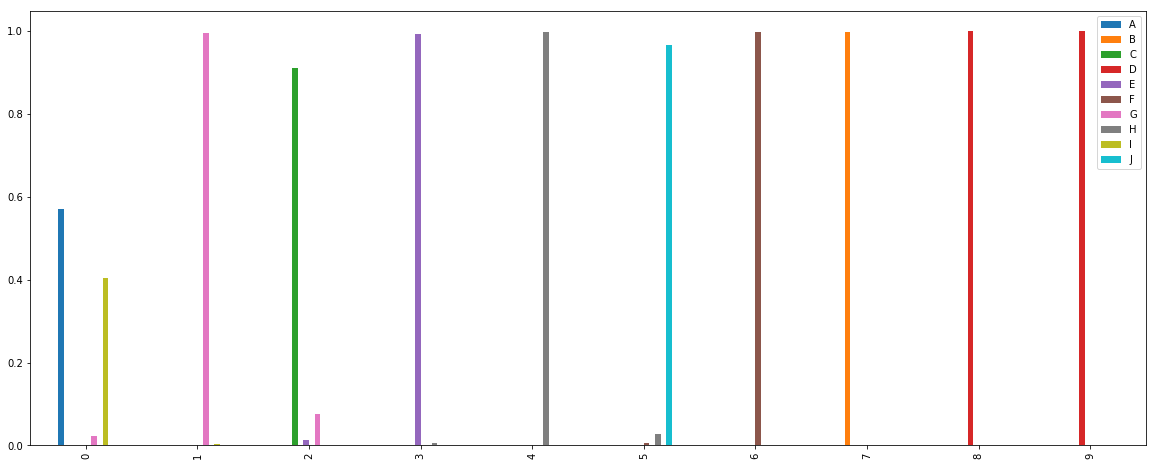

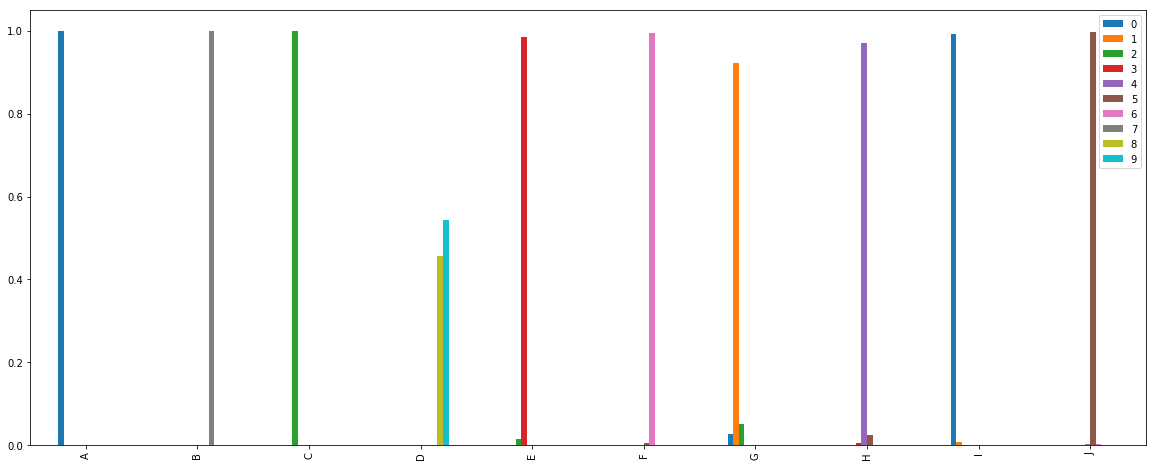

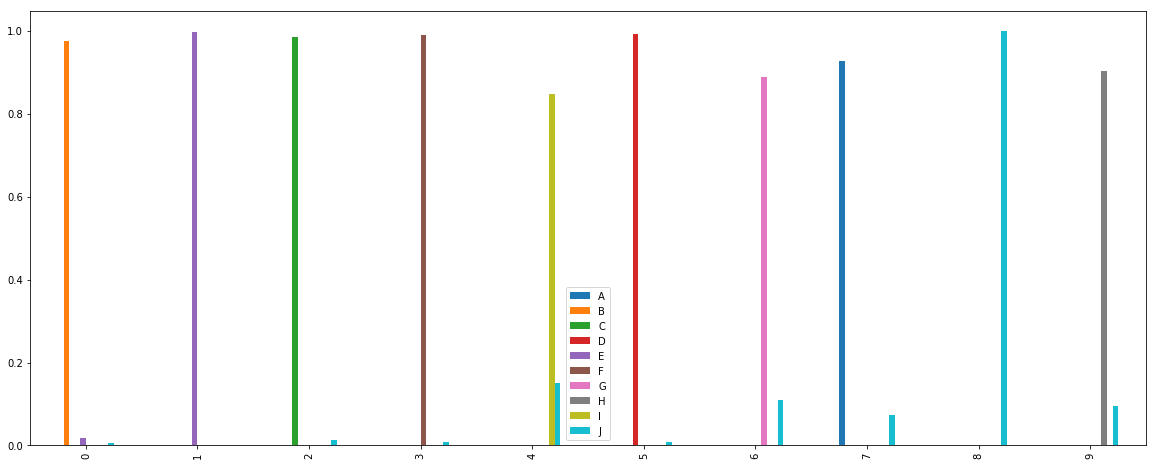

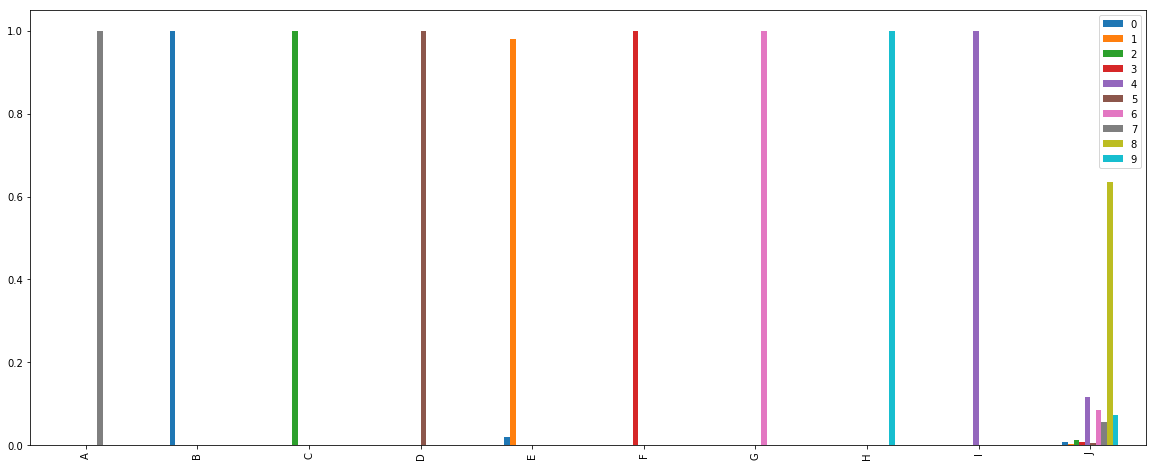

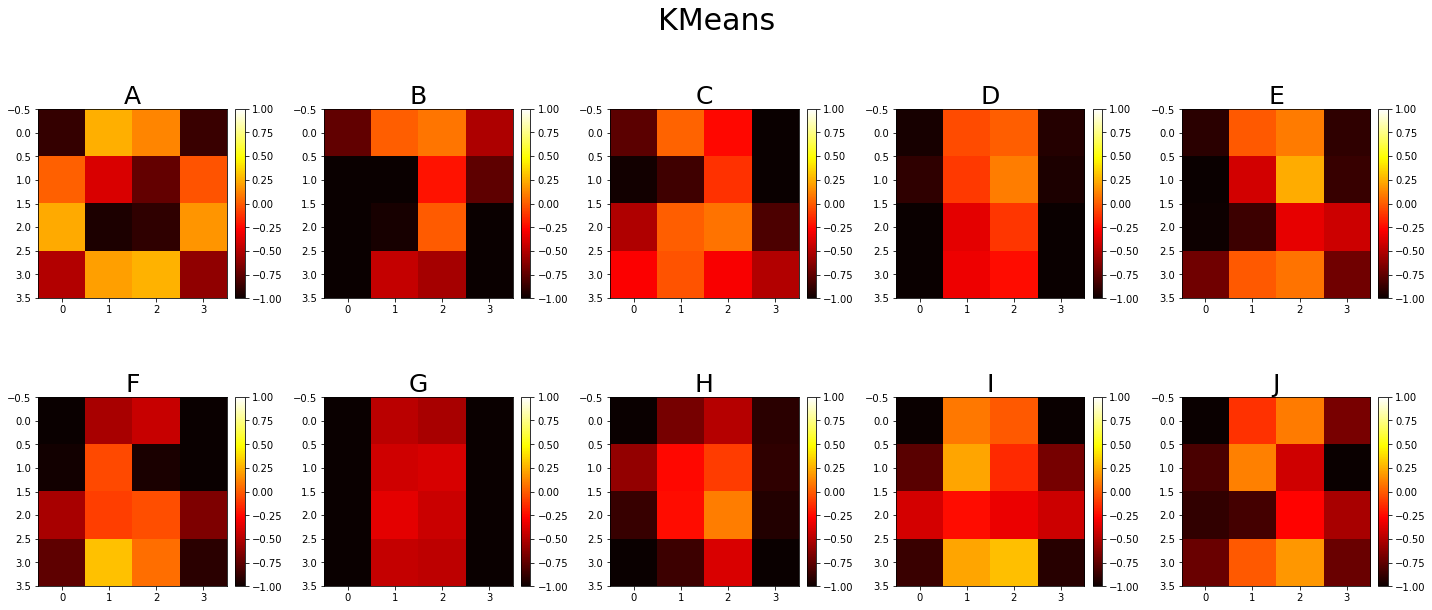

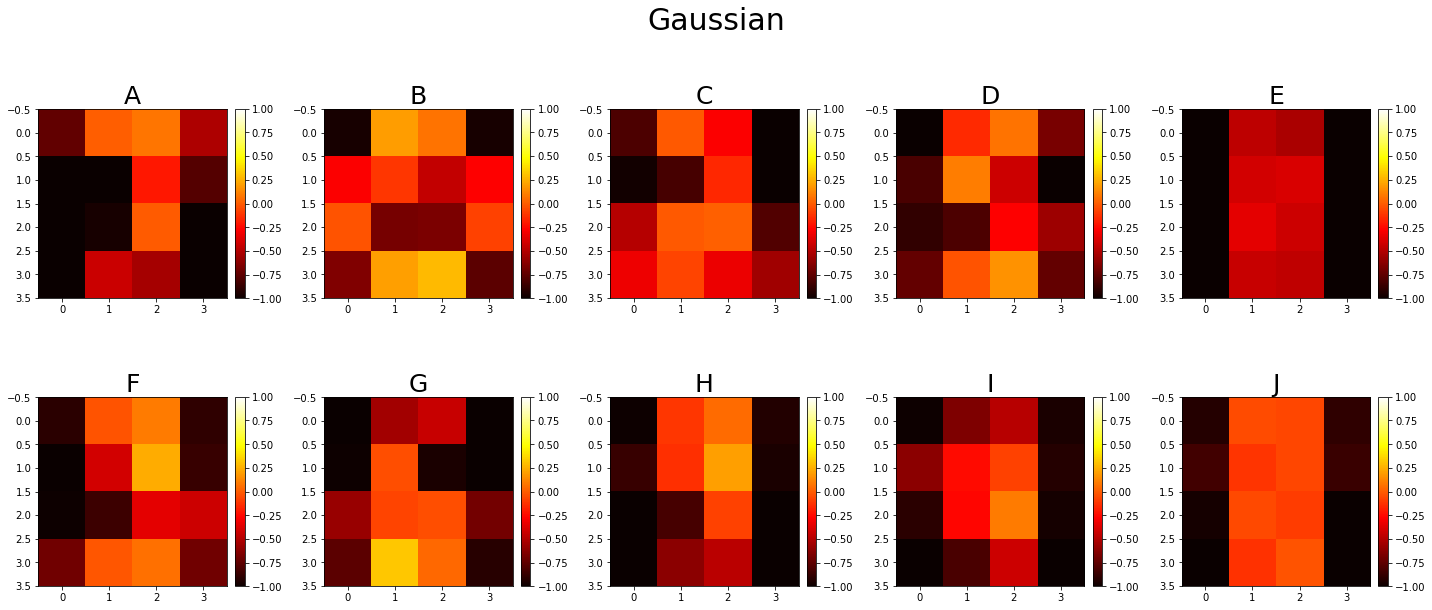

In [54]:
res3 = run_cluster_analysis(nb_data_reduced)
make_barplot("KMeans",res3)
make_barplot("Gaussian",res3)
print_subplots_all_clusters_reduced(nb_data_reduced,"KMeans","median",res3)
print_subplots_all_clusters_reduced(nb_data_reduced,"Gaussian","median",res3)

-0.674875

In [39]:
stat_img = get_stat_array_reduced(rows,stat,res)
nb_data_reduced.iloc[rows,0:16]

0    -1.000000
1    -0.987500
2    -0.138437
3    -0.937500
4    -0.733625
5    -0.354875
6     0.047500
7    -0.998563
8    -0.616125
9     0.111375
10    0.332375
11   -0.601938
12   -1.000000
13   -0.900687
14    0.170063
15   -1.000000
Name: 2, dtype: float64